In [6]:
#Dataset: http://cb.lk/covid_19
!wget http://cb.lk/covid_19

--2020-04-29 15:36:46--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-04-29 15:36:46--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-04-29 15:36:47--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-04-29 15:36:48--  https://www.dropbox.com/s/raw/7rjw

In [7]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
TRAIN_PATH = "CoviDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [0]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

train_generator.class_indices

Found 224 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

In [33]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [34]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch =8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps =2
)

Epoch 1/10
8/8 [==============================] - 71s 9s/step - loss: 1.1386 - accuracy: 0.5273 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 73s 9s/step - loss: 0.6785 - accuracy: 0.5391 - val_loss: 0.6657 - val_accuracy: 0.8500
Epoch 3/10
8/8 [==============================] - 70s 9s/step - loss: 0.5400 - accuracy: 0.7305 - val_loss: 0.4046 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 69s 9s/step - loss: 0.3657 - accuracy: 0.8320 - val_loss: 0.3700 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 70s 9s/step - loss: 0.3362 - accuracy: 0.8633 - val_loss: 0.2156 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 70s 9s/step - loss: 0.2070 - accuracy: 0.9180 - val_loss: 0.1585 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 70s 9s/step - loss: 0.1647 - accuracy: 0.9336 - val_loss: 0.1008 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

# Test Images

In [0]:
import os

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img= image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img= image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0) 

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [63]:
print(y_actual.shape)
print(y_test.shape)

(60,)
(60,)


In [0]:
cm = confusion_matrix(y_actual, y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


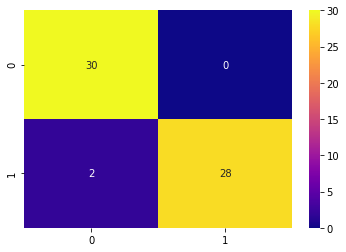

In [65]:
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)